In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import load_house_data, run_gradient_descent
from lab_utils_multi import norm_plot, plt_equal_scale, plot_cost_i_w
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

In [11]:
data = np.loadtxt("./data/houses.txt",delimiter = ',',skiprows = 1)
X_train = data[:,:4]
Y_train = data[:,4]
X_features = ['size(sqft)', 'bedrooms', 'floors','age']

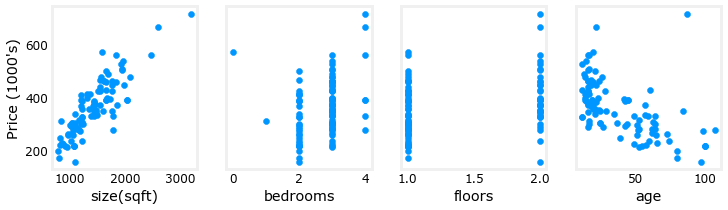

In [13]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey = True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],Y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [14]:
_,_,hist = run_gradient_descent(X_train, Y_train,10,alpha = 9.9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 9.55884e+04  5.5e-01  1.0e-03  5.1e-04  1.2e-02  3.6e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 1.28213e+05 -8.8e-02 -1.7e-04 -1.0e-04 -3.4e-03 -4.8e-05  6.4e+05  1.2e+03  6.2e+02  1.6e+04  4.1e+02
        2 1.72159e+05  6.5e-01  1.2e-03  5.9e-04  1.3e-02  4.3e-04 -7.4e+05 -1.4e+03 -7.0e+02 -1.7e+04 -4.9e+02
        3 2.31358e+05 -2.1e-01 -4.0e-04 -2.3e-04 -7.5e-03 -1.2e-04  8.6e+05  1.6e+03  8.3e+02  2.1e+04  5.6e+02
        4 3.11100e+05  7.9e-01  1.4e-03  7.1e-04  1.5e-02  5.3e-04 -1.0e+06 -1.8e+03 -9.5e+02 -2.3e+04 -6.6e+02
        5 4.18517e+05 -3.7e-01 -7.1e-04 -4.0e-04 -1.3e-02 -2.1e-04  1.2e+06  2.1e+03  1.1e+03  2.8e+04  7.5e+02
        6 5.63212e+05  9.7e-01  1.7e-03  8.7e-04  1.8e-02  6.6e-04 -1.3e+06 -2.5e+03 -1.3e+03 -3.1e+04 -

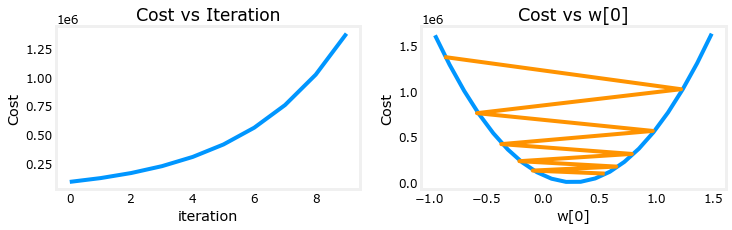

In [15]:
plot_cost_i_w(X_train,Y_train,hist)

In [16]:
def zscore_normalize_features(X):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X-mu) / sigma
    return (X_norm, mu, sigma)

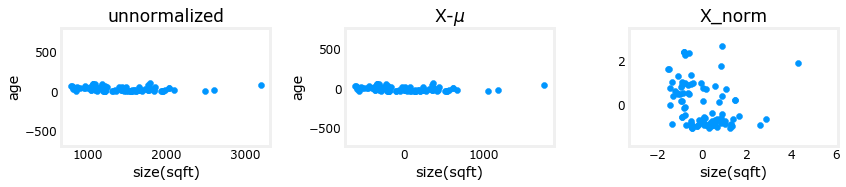

In [24]:
mu = np.mean(X_train, axis = 0)
sigma = np.std(X_train, axis = 0)
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma


fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey = False)
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[1].set_ylabel(X_features[3]);
ax[1].set_title(r"X-$\mu$")
ax[1].axis('equal')


ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"X_norm")
ax[2].axis('equal')

plt.tight_layout(rect = [0,0.03,1,0.95])
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

In [32]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)', 'bedrooms','floors','age']

In [35]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]
